## Model V

* **Corpora**: 

    * Norms: McRae et al. (2005)
    * Information Corpus: Brown

* **Model**: Jacob & Katrin Model

    * Ideas: The same as that of Model IV.
    
    * Procedures:
        * Training: Make predicate-argument (subject/object) cooccurrence matrices $S_{|V|\times|W_{subj}|}$ and $O_{|V|\times|W_{obj}|}$, and derive predicate-property cooccurrence matrices $S'_{|V|\times|P_{subj}|}$ and $O'_{|V|\times|P_{obj}|}$. Finally make a predicate-topic model from which we can get two distributions $p(prop\mid topic)$ and $p(topic\mid predicate)$.
        * Learning: On encountering a sentence $s$ with an unknown word $u$ and predicate $v$, we first compute a distribution over properties for $v$: $p({prop}_i\mid v) = \sum_{topic}p({prop}_i\mid topic)p(topic\mid v)$. Using this distribution, we update the (Dirichlet) weights over properties for $u$ by $u_{props} := u_{props} + \lambda * v_{props}$, where $\lambda$ models learning rate of the agent.
        * Evaluation: With $u$'s Dirchlet weights $u_{props}$, we obtain $k$ samples of distributions over properties (Multinomial), and
            * Qualitative: Observe the spikes in the samples (corresponding to particular properties), see if they correspond to intuition.
            * Quantitative: Compute average entropy of sample distribution (multinomials) -- lower entropy indicates good learning outcome.
            
    * Algorithm:
        * Let $W$ be the set of norm nouns ($W_{subj},W_{obj}$ are subj/obj-only sets), $V$ be the set of verbs which have at least one $w\in W$ evidenced in its core argument position, $P$ be the set of properties.
        * For each $v\in V$, make two lists $v_{subj}$ and $v_{obj}$ -- lists of occurred $w$s in the subject and the object position.
        * Make predicate-argument cooccurrence matrix $S_{|V|\times|W_{subj}|}$ and $O_{|V|\times|W_{obj}|}$.
        * Make predicate-property cooccurrence matrices $S'_{|V|\times|P_{subj}|}$ and $O'_{|V|\times|P_{obj}|}$.
        * Build predicate topic model from which we get distributions $p(prop\mid topic)$ and $p(topic\mid predicate)$.
        * Learn the Dirichlet weights of unknown word $u_{props}$.
        * Sample from $Dir(u_{props})$ for evaluation.

## 0. Load Corpora

### A. Norms

In [1]:
import pandas as pd

In [2]:
data_path = "/Users/jacobsw/Desktop/CODER/IMPLEMENTATION_CAMP/BASIC_TOPICS/DISTRIBUTIONAL_SEMANTICS/DATA/McRae-BRM-InPress/"

In [3]:
df = pd.read_csv(data_path+"CONCS_FEATS_concstats_brm.xls", delimiter='\t')

In [4]:
print df.columns

Index([u'Concept', u'Feature', u'WB_Label', u'WB_Maj', u'WB_Min', u'BR_Label',
       u'Prod_Freq', u'Rank_PF', u'Sum_PF_No_Tax', u'CPF', u'Disting',
       u'Distinct', u'CV_No_Tax', u'Intercorr_Str_Tax',
       u'Intercorr_Str_No_Tax', u'Feat_Length_Including_Spaces', u'Phon_1st',
       u'KF', u'ln(KF)', u'BNC', u'ln(BNC)', u'Familiarity', u'Length_Letters',
       u'Length_Phonemes', u'Length_Syllables', u'Bigram', u'Trigram',
       u'ColtheartN', u'Num_Feats_Tax', u'Num_Feats_No_Tax',
       u'Num_Disting_Feats_No_Tax', u'Disting_Feats_%_No_Tax',
       u'Mean_Distinct_No_Tax', u'Mean_CV_No_Tax', u'Density_No_Tax',
       u'Num_Corred_Pairs_No_Tax', u'%_Corred_Pairs_No_Tax', u'Num_Func',
       u'Num_Vis_Mot', u'Num_VisF&S', u'Num_Vis_Col', u'Num_Sound',
       u'Num_Taste', u'Num_Smell', u'Num_Tact', u'Num_Ency', u'Num_Tax'],
      dtype='object')


In [5]:
df.head(10)

,Concept,Feature,WB_Label,WB_Maj,WB_Min,BR_Label,Prod_Freq,Rank_PF,Sum_PF_No_Tax,CPF,...,Num_Func,Num_Vis_Mot,Num_VisF&S,Num_Vis_Col,Num_Sound,Num_Taste,Num_Smell,Num_Tact,Num_Ency,Num_Tax
0,accordion,a_musical_instrument,superordinate,c,h,taxonomic,28,1,NaN,18,...,2,0,2,0,2,0,0,0,2,1
1,accordion,associated_with_polkas,associated_entity,s,e,encyclopaedic,9,4,9.0,1,...,2,0,2,0,2,0,0,0,2,1
2,accordion,has_buttons,external_component,e,ce,visual-form_and_surface,8,5,163.0,13,...,2,0,2,0,2,0,0,0,2,1
3,accordion,has_keys,external_component,e,ce,visual-form_and_surface,17,2,108.0,7,...,2,0,2,0,2,0,0,0,2,1
4,accordion,inbeh_-_produces_music,entity_behavior,e,b,sound,6,7,178.0,13,...,2,0,2,0,2,0,0,0,2,1
5,accordion,is_loud,external_surface_property,e,se,sound,6,7,317.0,34,...,2,0,2,0,2,0,0,0,2,1
6,accordion,requires_air,contingency,i,c,encyclopaedic,11,3,49.0,4,...,2,0,2,0,2,0,0,0,2,1
7,accordion,used_by_moving_bellows,action,s,a,function,8,5,8.0,1,...,2,0,2,0,2,0,0,0,2,1
8,accordion,worn_on_chest,function,s,f,function,6,7,6.0,1,...,2,0,2,0,2,0,0,0,2,1
9,airplane,beh_-_flies,entity_behavior,e,b,visual-motion,25,1,712.0,46,...,3,3,5,0,0,0,0,0,2,0


### B. Brown

In [6]:
from nltk.corpus import brown
from spacy.en import English

In [7]:
parser = English()

In [8]:
brown_sents = [unicode(' '.join(sent)) for sent in brown.sents()]

In [9]:
%%time
parsed_sents = [parser(sent) for sent in brown_sents]

CPU times: user 1min 24s, sys: 455 ms, total: 1min 24s
Wall time: 1min 25s


In [10]:
def make_token2lemma_dict(parsed_sents):
    
    lemmas = set()
    token2lemma = {}
    for parsed_sent in parsed_sents:
        for token in parsed_sent:
            token2lemma[token.orth_] = token.lemma_
            lemmas.add(token.lemma_)
    
    return lemmas, token2lemma

In [11]:
%%time
brown_lemmas, brown_t2l = make_token2lemma_dict(parsed_sents)

CPU times: user 1.09 s, sys: 36.7 ms, total: 1.13 s
Wall time: 1.1 s


In [12]:
print brown_t2l['books']

book


### C. Synchronize Norms & Brown

In [13]:
norms = {df.ix[i]['Concept'] for i in range(df.shape[0])}

In [14]:
def norm_normalize(norm):
    
    norm = norm.split('_')[0] if '_' in norm else norm
    if norm in brown_t2l: return brown_t2l[norm]
    return norm


In [15]:
print norm_normalize('cat_(kitchen)')
print norm_normalize('cat')

cat
cat


In [16]:
# Count Out-Of-Vocab Norms For Brown
t = [] 
for norm in norms:
    norm = norm.split('_')[0] if '_' in norm else norm
    if norm in brown_lemmas or norm in brown_t2l: continue
    t.append(norm)

In [17]:
print t
print len(t)

['earmuffs', 'bike', 'screwdriver', 'unicycle', 'camisole', 'crossbow', 'hamster', 'bra', 'sledgehammer', 'skateboard', 'leotards', 'rhubarb', 'platypus', 'pelican', 'minnow', 'canary', 'spatula', 'motorcycle', 'iguana', 'chickadee', 'giraffe', 'tricycle', 'bazooka', 'tomahawk', 'ostrich', 'cucumber', 'lettuce', 'whale', 'stork', 'bluejay', 'colander', 'chipmunk', 'escalator', 'partridge', 'parka', 'zucchini', 'dunebuggy', 'machete', 'crowbar', 'housefly', 'blender', 'nectarine', 'scooter', 'cougar', 'penguin', 'emu', 'honeydew', 'wheelbarrow', 'harmonica', 'eggplant', 'groundhog', 'harpoon', 'yam', 'squid', 'toaster', 'moose', 'tuna', 'surfboard', 'nylons', 'raven', 'budgie', 'fridge', 'gopher', 'flamingo', 'sleigh', 'trombone', 'strainer', 'dagger', 'chimp', 'buzzard', 'guppy', 'grater', 'nightgown', 'cello', 'hornet', 'finch', 'tangerine', 'gorilla', 'caribou']
79


** SPECIAL BLOCK: FOR LEAVE-ONE-OUT **

In [18]:
out_word = 'alligator'
norms = filter(lambda norm: norm!=out_word, map(lambda norm:norm_normalize(norm), norms))

In [19]:
norms = map(lambda norm:norm_normalize(norm), norms)

In [20]:
norms_set = set(norms) # for faster lookup

### D. Make Norm2Prop Dictionary

In [23]:
from collections import defaultdict

In [41]:
def make_normprop_dicts(df):

    norm2prop = defaultdict(list)
    normprop_freq = defaultdict(int)
    for i in xrange(df.shape[0]):
        norm = norm_normalize(df['Concept'][i])
        prop = df['Feature'][i]
        norm2prop[norm].append(prop) # all unique in McRae.
        normprop_freq[(norm,prop)] = df['Prod_Freq'][i]
    
    return norm2prop, normprop_freq

In [43]:
norm2prop, normprop_freq = make_normprop_dicts(df) # only 532 after normalization, diminished distinction a bit, but who cares.

In [45]:
print norm2prop['cat']

['a_baby_is_a_kitten', 'a_feline', 'a_mammal', 'a_pet', 'an_animal', 'beh_-_eats', 'beh_-_eats_mice', 'beh_-_kills', 'beh_-_meows', 'beh_-_purrs', 'has_4_legs', 'has_a_tail', 'has_claws', 'has_eyes', 'has_fur', 'has_legs', 'has_paws', 'has_whiskers', 'is_domestic', 'is_independent']


In [46]:
print normprop_freq[('cat','an_animal')]

21


## I. Training

### A. Make Information Dicts/Matrices

In [26]:
def extract_dep_triples(parsed_sents):
    
    triples = []
    for parsed_sent in parsed_sents:
        for token in parsed_sent:
            lemma_triple = (token.lemma_, token.dep_, token.head.lemma_)
            triples.append(lemma_triple)
    
    return triples

In [27]:
%%time
dep_triples = extract_dep_triples(parsed_sents)

CPU times: user 983 ms, sys: 114 ms, total: 1.1 s
Wall time: 1.09 s


In [53]:
features = {df.ix[i]['Feature'] for i in range(df.shape[0])}
f2i = {f:i for i,f in enumerate(features)}
feature_list = list(features)

In [92]:
def get_w_set(triples, argtype):
    
    w_set = set()
    for triple in triples:
        if triple[1].endswith(argtype) and triple[0] in norms_set:
            w_set.add(triple[0])
    
    return w_set

In [93]:
%%time
w_subj = get_w_set(dep_triples, argtype='subj')
w_obj = get_w_set(dep_triples, argtype='obj')

CPU times: user 754 ms, sys: 8.52 ms, total: 763 ms
Wall time: 760 ms


In [94]:
print len(W_subj), len(W_obj)
print len(W_subj.intersection(W_obj))

232 394
221


In [95]:
def get_v_set(triples, argtype):
    
    v_set = set()
    for triple in triples:
        if triple[1].endswith(argtype) and triple[0] in norms_set:
            v_set.add(triple[2])
    
    return v_set

In [96]:
%%time
v_subj = get_v_set(dep_triples, 'subj')
v_obj = get_v_set(dep_triples, 'obj')

CPU times: user 745 ms, sys: 9.12 ms, total: 754 ms
Wall time: 750 ms


In [97]:
print len(V_subj), len(V_obj)
print len(V_subj.intersection(V_obj))

414 619
188


In [126]:
vsubj2i = {v:i for i,v in enumerate(list(v_subj))}
vobj2i = {v:i for i,v in enumerate(list(v_obj))}
subj2i = {subj:i for i,subj in enumerate(list(w_subj))}
obj2i = {obj:i for i,obj in enumerate(list(w_obj))}

In [146]:
i2vsubj = list(v_subj) # for easy reference
i2vobj = list(v_obj)

In [127]:
print len(vsubj2i), len(vobj2i), len(subj2i), len(obj2i)

414 619 232 394


In [128]:
import numpy as np

In [129]:
def make_v2prop_matrix(triples, v2i, w2i, argtype):
    
    v2prop_mat = np.zeros((len(v2i),len(f2i)))
    for triple in triples:
        if triple[1].endswith(argtype) and triple[0] in w2i:
            props = norm2prop[triple[0]]
            for prop in props:
                v2prop_mat[v2i[triple[2]]][f2i[prop]] += normprop_freq[(triple[0],prop)]
    
    return v2prop_mat

In [130]:
%%time
subj_v2prop_mat = make_v2prop_matrix(dep_triples, vsubj2i, subj2i, 'subj')
obj_v2prop_mat = make_v2prop_matrix(dep_triples, vobj2i, obj2i, 'obj')

CPU times: user 901 ms, sys: 20.7 ms, total: 922 ms
Wall time: 918 ms


In [131]:
print subj_v2prop_mat.shape, obj_v2prop_mat.shape

(414, 2526) (619, 2526)


### B. Make Fake Documents & Topic Model

In [132]:
def make_fake_documents(v2prop_mat):
    
    docs = []
    for prop_counts in v2prop_mat:
        doc = []
        for i,prop_count in enumerate(prop_counts):
            doc += [feature_list[i]] * int(prop_count)
        docs.append(doc)
    
    return docs

In [133]:
%%time
subj_docs = make_fake_documents(subj_v2prop_mat)
obj_docs = make_fake_documents(obj_v2prop_mat)

CPU times: user 1.22 s, sys: 17.4 ms, total: 1.24 s
Wall time: 1.24 s


In [134]:
print len(subj_docs), len(obj_docs)

414 619


In [135]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [136]:
class TopicModel:
    
    def __init__(self, documents, num_topics=100, num_iters=5):
        dic = corpora.Dictionary(documents)
        documents = [dic.doc2bow(document) for document in documents]
        self.documents = documents
        self.lda = LdaModel(documents, num_topics=num_topics, id2word=dic, passes=num_iters)
    
    def summarize(self, num_topics=100, num_words=5):
        freq_stats = self.lda.print_topics(num_topics=num_topics, num_words=num_words)
        print "Statistics"
        print 
        for i,document in enumerate(self.documents):
            print "Most %d-Frequent Words in Topic %d:" % (num_words,freq_stats[i][0])
            print freq_stats[i][1]
            print "Topic-Distribution:"
            print self.lda.get_document_topics(document)
            print

In [161]:
%%time
tm_subj = TopicModel(subj_docs)
tm_obj = TopicModel(obj_docs)

CPU times: user 21.7 s, sys: 190 ms, total: 21.9 s
Wall time: 21.8 s


In [162]:
def make_topicprop_dict(lda, ntopics=100):
    
    topicprop_dict = defaultdict(float)
    for topic in xrange(ntopics):
        propprob_pairs = lda.get_topic_terms(topic, topn=len(lda.id2word))
        for prop,prob in propprob_pairs: # prop here is an index
            topicprop_dict[(topic,lda.id2word[prop])] = prob
    
    return topicprop_dict

In [163]:
%%time
subj_topicprop_dict = make_topicprop_dict(tm_subj.lda)
obj_topicprop_dict = make_topicprop_dict(tm_obj.lda)

CPU times: user 585 ms, sys: 12.5 ms, total: 597 ms
Wall time: 596 ms


In [164]:
obj_topicprop_dict[(0,'an_animal')]

0.0090520232491840876

In [165]:
def p_prop_given_topic(prop, topic, argtype): 
    
    return subj_topicprop_dict[(topic,prop)] if argtype=='subj' else obj_topicprop_dict[(topic,prop)]
        

In [166]:
p_prop_given_topic('an_animal',0,'obj')

0.0090520232491840876

$p(prop\mid topic)$ and $p(topic\mid predicate)$

In [160]:
def make_topicpred_dict(tm, i2v):
    
    topicprop_dict = defaultdict(float)
    for i,v_doc in enumerate(tm.documents):
        topicprob_pairs = tm.lda.get_document_topics(v_doc)
        for topic,prob in topicprob_pairs:
            topicprop_dict[(topic,i2v[i])] = prob
            
    return topicprop_dict
    

In [167]:
%%time
subj_topicpred_dict = make_topicpred_dict(tm_subj, i2vsubj)
obj_topicpred_dict = make_topicpred_dict(tm_obj, i2vobj)

CPU times: user 896 ms, sys: 15.4 ms, total: 911 ms
Wall time: 905 ms


In [177]:
def p_topic_given_pred(topic, v, argtype):
    
    return subj_topicpred_dict[(topic,v)] if argtype=='subj' else obj_topicpred_dict[(topic,v)]

In [180]:
sum(p_prop_given_topic('an_animal',t,'obj')*p_topic_given_pred(t,'feed','obj') for t in range(100))

0.037383539774057117

## II. Learning

In [188]:
def get_pred_prop_dist(v, argtype, ntopics=100):
    
    return np.asarray([sum(p_prop_given_topic(prop,t,argtype)*p_topic_given_pred(t,v,argtype) 
                           for t in xrange(ntopics))
                       for prop in feature_list])

def initialize_propdist(): 
    
    return np.zeros(len(feature_list)) + 1e-20

### A. Single Update

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
from scipy.stats import entropy

In [220]:
def update(u, v, argtype, lmd=5, ntopics=100):
    
    u_propwgts = initialize_propdist()
    update_propwgts = lmd * get_pred_prop_dist(v, argtype, ntopics)
    
    return u_propwgts + update_propwgts

In [218]:
def update_summary(w, v, w_propwgts, size=100, topk=5):
    
    avg_propdist = np.mean(np.random.dirichlet(w_propwgts, size),axis=0)
    
    plt.plot(avg_propdist)
    plt.title('Word: %s | Updated by %s' % (w, v))
    plt.xlabel('Properties')
    plt.ylabel('Probability')
    plt.show()
    
    print entropy(avg_propdist); print
    
    topk_props_idx = np.argsort(avg_propdist)[::-1][:topk]
    for i,idx in enumerate(topk_props_idx):
        print "%dth Property: %s (prob=%.6f%%,idx=%d)" % (i+1,feature_list[idx],avg_propdist[idx],idx)

In [221]:
feed_propwgts = update('alligator', 'feed', 'obj')

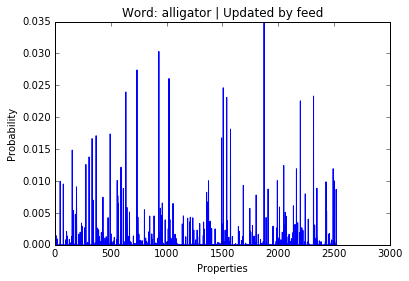

4.94428473795

1th Property: made_of_metal (prob=0.034918%,idx=1874)
2th Property: an_animal (prob=0.030312%,idx=931)
3th Property: is_large (prob=0.027420%,idx=735)
4th Property: used_by_riding (prob=0.026073%,idx=1022)
5th Property: has_4_legs (prob=0.024619%,idx=1508)


In [223]:
update_summary('alligator', 'feed', feed_propwgts)

In [224]:
is_propwgts = update('alligator', 'be', 'subj')

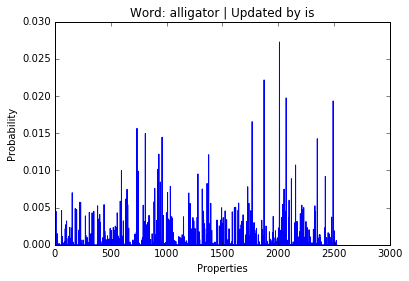

5.43274610466

1th Property: made_of_wood (prob=0.027258%,idx=2012)
2th Property: made_of_metal (prob=0.022159%,idx=1874)
3th Property: used_for_living_in (prob=0.019740%,idx=2072)
4th Property: is_small (prob=0.019333%,idx=2493)
5th Property: requires_drivers (prob=0.016551%,idx=1767)


In [225]:
update_summary('alligator', 'is', is_propwgts)

### B. 3-Updates

In [229]:
class Update:
    
    def __init__(self, word, lmd=5):
        self.word = word
        self.lmd = lmd
        self.word_propwgts = initialize_propdist()
    
    def single_update(self, v, argtype):
        self.word_propwgts = self.word_propwgts + self.lmd * get_pred_prop_dist(v, argtype)

    def update(self, v_argtype_pairs, topk=5, size=100):
        for v, argtype in v_argtype_pairs:
            self.single_update(v, argtype)
        avg_propdist = np.mean(np.random.dirichlet(self.word_propwgts, size),axis=0)
        plt.plot(avg_propdist)
        plt.title('Word: %s' % self.word)
        plt.xlabel('Properties')
        plt.ylabel('Probability')
        plt.show() 
        print entropy(avg_propdist); print
        topk_props_idx = np.argsort(avg_propdist)[::-1][:topk]
        for i,idx in enumerate(topk_props_idx):
            print "%dth Property: %s (prob=%.6f%%,idx=%d)" % (i+1,feature_list[idx],avg_propdist[idx],idx)         
  

In [230]:
informative_update = Update('alligator')

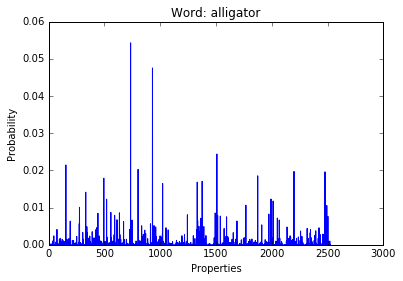

5.21266372159

1th Property: is_large (prob=0.054280%,idx=735)
2th Property: an_animal (prob=0.047534%,idx=931)
3th Property: has_4_legs (prob=0.024407%,idx=1508)
4th Property: used_for_transportation (prob=0.021455%,idx=155)
5th Property: a_mammal (prob=0.020295%,idx=802)


In [231]:
informative_update.update([('feed','obj'),('catch','obj'),('roam','subj')])

In [232]:
uninformative_update = Update('alligator')

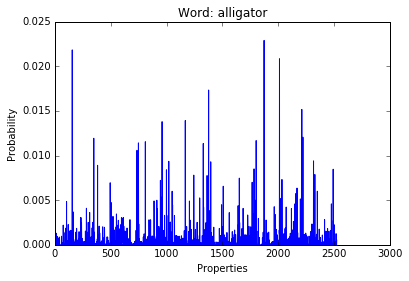

5.80263256205

1th Property: made_of_metal (prob=0.022895%,idx=1874)
2th Property: used_for_transportation (prob=0.021831%,idx=155)
3th Property: made_of_wood (prob=0.020837%,idx=2012)
4th Property: has_doors (prob=0.017335%,idx=1377)
5th Property: has_4_wheels (prob=0.015165%,idx=2212)


In [233]:
uninformative_update.update([('be','subj'),('have','obj'),('get','obj')])